In [649]:
from PIL import Image

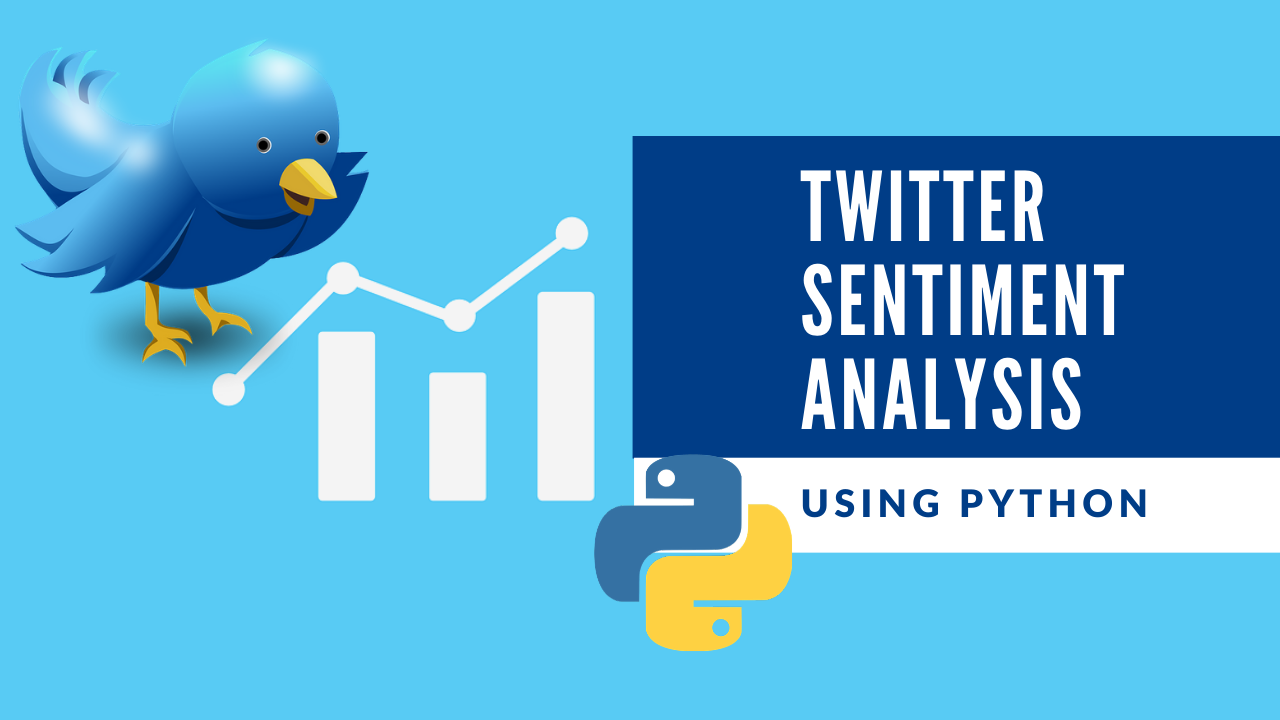

In [650]:
Image.open('image/twitter.png')

In [615]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tweepy as tw
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize 
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tg248\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tg248\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [616]:
# Several keys provided by twitter api.

consumer_key=  "XQAm9vrI8eFPAf8lCyLoYXyXT"
consumer_secret="ibt3A81pvYozqG852IZho3ho1bGr26tKMLOuCRCRmtbHK1NHP6"
access_token= "1360556876270768129-hB2HeoA7gYFhI2aXw3EF6FztBmuETF"
access_token_secret= "25ASqPsKmArNH1r0zRsQwhLY7Xze3QlKMtYSdHi9oPYMF"

In [617]:
# Authentication process using different keys.

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [624]:
# Function to extract tweets.

def Extract_tweets(search_term):
    
    tweets = tw.Cursor(api.search,
              q=search_term,
              lang="en").items(3000)
    
    for twe in tweets:
        data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        
    return data

  

In [625]:
# Function to do the preprocessing of tweets stored in dataframe

def tweet_preprocessing(df1):
    
    # 1st lets lower the phrases.

    df1['Tweets']=df1.Tweets.str.lower()
    
    
    # Lets remove any punctuation like . or , except lower or capital alphabets

    # if we have only lower alphabets then we can write like this ^a-z or if we have only capital then ^A-Z
    
    df1['Cleaned_tweets'] = df1.Tweets.str.replace('[^a-zA-Z]', ' ')
    df1[:50]

    
    # Now we have to strip or remove extra whitespaces from left and right of phrases because in between
    #spaces will be automatically removed once we do tokenization.

    df1['Cleaned_tweets']= df1['Cleaned_tweets'].str.strip()
    
    #Lets break tweets into tokens
    
    df1['Tokens']=df1['Cleaned_tweets'].str.split()
    df1.head()
    
    # Lets apply stop words
   
    df1.Tokens = df1.Tokens.apply(lambda x : [w for w in x if w not in stop])
    df1.head()
    
    # Lets apply stemming on Tokens 
    stemmer = PorterStemmer()
    df1.Tokens= df1.Tokens.apply(lambda x : [stemmer.stem(w) for w in x])
    df1.head()
    
    
    # Now lets convert tokens into Phrase again

    df1['Tweets1'] = df1.Tokens.apply(lambda x: " ".join(x))
    df1.head()
    
    
    #Now lets save tweets1 in another dataframe.
    df2=df1[['Tweets1']]
     
    
    return df2
    

In [626]:
# Function to get the polarity of tweets

def Sentiment_analysis(df1):
    
    df1['Polarity'] = df1.apply(lambda x: TextBlob(x['Tweets1']).sentiment.polarity, axis=1)
    
    
    return df1

In [627]:
# Lets perform tweets extraction, preprocessing, sentiment analysis for AmazonIndia

df1=Extract_tweets("#AmazonIndia")
df1= tweet_preprocessing(df1)
df1=Sentiment_analysis(df1)
df1.shape



(607, 2)

In [628]:
# Lets perform tweets extraction, preprocessing, sentiment analysis for Flipkart

df2=Extract_tweets("#Flipkart")
df2= tweet_preprocessing(df2)
df2=Sentiment_analysis(df2)
df2.shape

(1193, 2)

In [629]:
# Lets perform tweets extraction, preprocessing, sentiment analysis for Snapdeal

df3=Extract_tweets("#Snapdeal")
df3= tweet_preprocessing(df3)
df3=Sentiment_analysis(df3)
df3.shape

(30, 2)

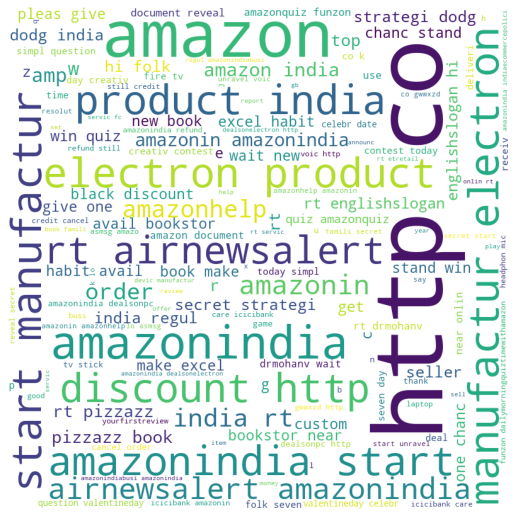

In [630]:
# Lets create word cloud for Amazon India tweets

comment_words =''

for val in df1.Tweets1:
    tokens = val.split()
    comment_words+=" ".join(tokens)+" "
    

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop,
                     min_font_size =10).generate(comment_words)



plt.figure(figsize =(8,7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

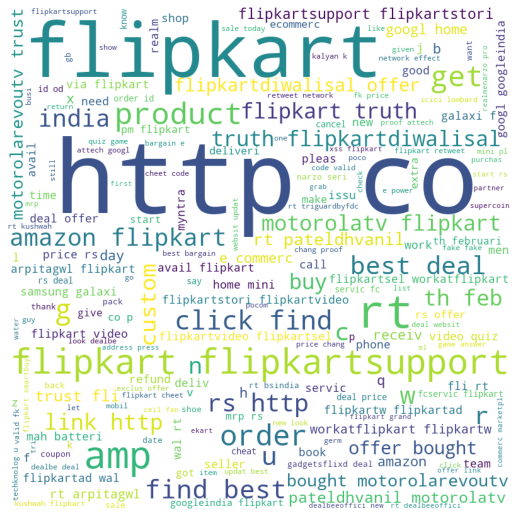

In [631]:
# Lets create word cloud for Flipkart tweets

comment_words =''

for val in df2.Tweets1:
    tokens = val.split()
    comment_words+=" ".join(tokens)+" "
    

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop,
                     min_font_size =10).generate(comment_words)



plt.figure(figsize =(8,7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

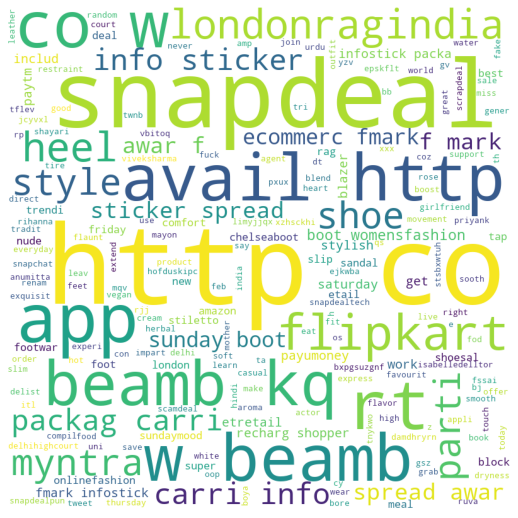

In [632]:
# Lets create word cloud for Amazon India tweets

comment_words =''


for val in df3.Tweets1:
    tokens = val.split()
    comment_words+=" ".join(tokens)+" "
    

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop,
                     min_font_size =10).generate(comment_words)



plt.figure(figsize =(8,7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Lets check how many positive, negative and neutral sentiments are for each compitetors  Out of 100 tweets -

In [645]:
def Polarity(df1,name):
    total_pos=0
    total_negative=0
    total_neutral=0
    
    for ind in df1.index:
        
        if df1['Polarity'][ind] >= 0:
            total_pos=total_pos+1
        
                
        elif df1['Polarity'][ind] < 0:
            total_negative=total_negative+1
            
        else:
            total_neutral=total_neutral+1
            
    print('Total tweets for', name  , (total_pos+total_negative+total_neutral))
    print('Total Positive tweets for ',name , (total_pos))
    print('% of Positive tweets for ',name , (total_pos/(total_pos+total_negative+total_neutral)*100))
    print('Total Negative tweets for ', name , (total_negative))
    print('% of Negative tweets for ',name , (total_negative/(total_pos+total_negative+total_neutral)*100))
   
    
    
   
        


In [646]:
Polarity(df1,'Amazon India')


Total tweets for Amazon India 607
Total Positive tweets for  Amazon India 507
% of Positive tweets for  Amazon India 83.52553542009885
Total Negative tweets for  Amazon India 100
% of Negative tweets for  Amazon India 16.474464579901152


In [647]:
Polarity(df2, 'Flipkart')


Total tweets for Flipkart 1193
Total Positive tweets for  Flipkart 1039
% of Positive tweets for  Flipkart 87.09136630343671
Total Negative tweets for  Flipkart 154
% of Negative tweets for  Flipkart 12.908633696563285


In [648]:
Polarity(df3, 'Snapdeal')

Total tweets for Snapdeal 30
Total Positive tweets for  Snapdeal 27
% of Positive tweets for  Snapdeal 90.0
Total Negative tweets for  Snapdeal 3
% of Negative tweets for  Snapdeal 10.0


# Conclusion -

1)We can clearly see from above tweets analysis that maximum people are talking about flipkart then amazon india and only few 
are talking about snapdeal

2)Out of 1193 tweets for flipkart, around 87.5% of people are talking positive about flipkart

3)Out of 607 tweets for Amazon India, around 83.5% of people are talking positive about Amazon India

4)Last but not least, out of 30 tweets for Snapdeal, around 90 % of people are talking positive about Snapdeal but remember that
we only got 30 tweets.